This notebook demonstrates a few techniques to identify the most dominant frequencies in a time series

In [316]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [318]:
def get_data(x):
    x = x / 365 * 2 * np.pi
    return np.sin(x) + 0.4 * np.sin(3 * (x - 0.1)) +  0.1 * np.random.randn(len(x))

In [319]:
t = np.arange(0, 365 * 5, 1)
x = get_data(t)

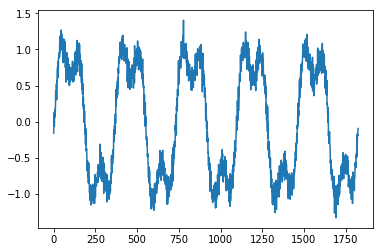

In [320]:
# Visualization
plt.plot(t, x)

# Finding dominant frequencies using FFT

In [321]:
# FFT
fft = np.fft.rfft(x)
fft_ampl = np.abs(fft)
fft_angle = np.angle(fft)

(0, 20)

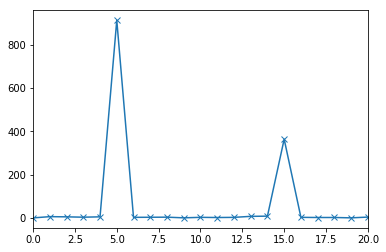

In [322]:
plt.plot(fft_ampl, 'x-')
plt.xlim(0, 20)

# Finding dominant frequencies using autocorrelation

### From defination

In [323]:
# Note the following is used to compute auto-covarriance
def compute_ck(x, k):
    mean = np.mean(x)
    return (x[:x.size - k] - mean) @ (x[k:] - mean) / (x.size - k)

In [324]:
compute_ck(x, 1) / compute_ck(x, 0)

0.9831563142922438

### Use np.correcef

In [325]:
np.corrcoef(x[:x.size - 1], x[1:])[0, 1]

0.9826334358422051

### Use statsmodels

In [326]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

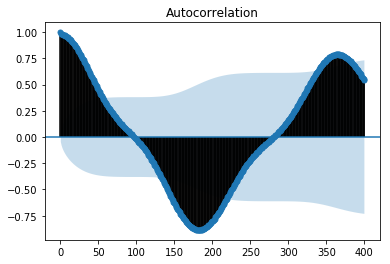

In [329]:
res = plot_acf(x, lags=400)

C:\Users\Justin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


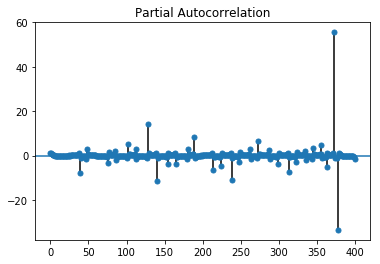

In [330]:
res = plot_pacf(x, lags=400)